In [19]:
import pandas as pd

data = pd.read_csv("../data/train/21-25_NFL_100.csv")
print(data.count())
data.head()

year           500
player         500
position       500
draft_round    500
dtype: int64


,year,player,position,draft_round
2021,1,Patrick Mahomes,Quarterback,1
2021,2,Aaron Donald,Defensive tackle,1
2021,3,Aaron Rodgers,Quarterback,1
2021,4,Derrick Henry,Running back,2
2021,5,Travis Kelce,Tight end,3


In [22]:
data = data.drop_duplicates()
data

,year,player,position,draft_round
2021,1,Patrick Mahomes,Quarterback,1
2021,2,Aaron Donald,Defensive tackle,1
2021,3,Aaron Rodgers,Quarterback,1
2021,4,Derrick Henry,Running back,2
2021,5,Travis Kelce,Tight end,3
...,...,...,...,...
2025,96,Lavonte David,Linebacker,2
2025,97,Drake London,Wide receiver,1
2025,98,Aaron Jones,Running back,5
2025,99,Leonard Williams,Defensive end,1


In [23]:
data.groupby('position').count()

,year,player,draft_round
position,,,
Tight end,1,1,1
Center,6,6,6
Cornerback,43,43,43
Defensive end,45,45,45
Defensive tackle,36,36,36
Free safety,10,10,10
Fullback,2,2,2
Guard,16,16,16
Inside linebacker,4,4,4


In [24]:
data.groupby('draft_round').count()

,year,player,position
draft_round,,,
1,245,245,245
2,91,91,91
3,58,58,58
4,23,23,23
5,39,39,39
6,12,12,12
7,4,4,4
Undrafted,14,14,14


In [25]:
pos = data[['position','draft_round']].copy()
pos

,position,draft_round
2021,Quarterback,1
2021,Defensive tackle,1
2021,Quarterback,1
2021,Running back,2
2021,Tight end,3
...,...,...
2025,Linebacker,2
2025,Wide receiver,1
2025,Running back,5
2025,Defensive end,1


In [26]:
pos.groupby('position')['draft_round'].count()

position
 Tight end             1
Center                 6
Cornerback            43
Defensive end         45
Defensive tackle      36
Free safety           10
Fullback               2
Guard                 16
Inside linebacker      4
Linebacker            42
Middle linebacker      6
Offensive tackle      25
Outside linebacker    19
Quarterback           67
Running back          42
Safety                23
Strong safety          5
Tight end             18
Wide receiver         76
Name: draft_round, dtype: int64

In [27]:
counts = pd.crosstab(pos["draft_round"], pos["position"])
counts


position,Tight end,Center,Cornerback,Defensive end,Defensive tackle,Free safety,Fullback,Guard,Inside linebacker,Linebacker,Middle linebacker,Offensive tackle,Outside linebacker,Quarterback,Running back,Safety,Strong safety,Tight end,Wide receiver
draft_round,,,,,,,,,,,,,,,,,,,
1,0,1,25,30,27,2,0,7,1,17,0,17,10,51,13,5,3,1,35
2,0,1,7,1,5,2,0,7,0,10,4,2,3,5,15,9,0,3,17
3,0,0,4,7,1,2,0,0,3,7,2,4,0,2,4,5,0,6,11
4,0,0,0,6,0,0,2,0,0,1,0,1,1,6,2,1,0,0,3
5,0,1,3,1,3,1,0,2,0,5,0,0,1,0,5,2,0,5,10
6,1,3,0,0,0,3,0,0,0,0,0,0,0,2,0,0,0,3,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,0
Undrafted,0,0,4,0,0,0,0,0,0,2,0,1,4,0,3,0,0,0,0


NameError: name 'plt' is not defined

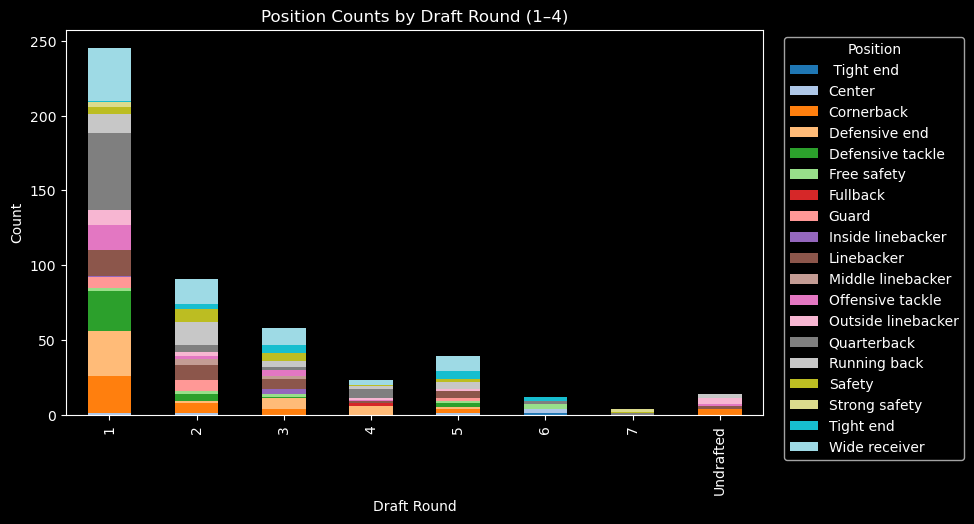

In [28]:
ax = counts.plot(kind="bar", stacked=True, figsize=(9, 5), colormap="tab20")
ax.set_xlabel("Draft Round")
ax.set_ylabel("Count")
ax.set_title("Position Counts by Draft Round (1–4)")
ax.legend(title="Position", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [29]:
top_k = 5
position_totals = pos.groupby("position")["count"].sum().sort_values(ascending=False)
top_positions = position_totals.head(top_k).index

KeyError: 'Column not found: count'

In [30]:
top_k = 7          # how many largest positions to keep (by total picks across all rounds)
sort_rounds = True # set False if you want to keep the original index order
as_percent = True  # True => multiply by 100 for percent display

# --- 1) Build counts table (rounds as rows, positions as columns)
# Assumes pos has columns: 'draft_round' and 'position'
counts = pd.crosstab(pos["draft_round"], pos["position"])

# Optional: ensure draft_round is numeric (helps with sorting)
# If your draft_round is already numeric, this will do nothing harmful.
try:
    counts.index = pd.to_numeric(counts.index)
except Exception:
    pass

# Optional: sort rounds numerically
if sort_rounds:
    counts = counts.sort_index()

# --- 2) Find the largest positions (by total picks across all rounds)
position_totals = counts.sum(axis=0)                 # total picks per position
top_positions = position_totals.nlargest(top_k).index
counts_top = counts.loc[:, top_positions]

# --- 3) Compute column-wise percentages: each column sums to 1 across rounds
# This gives the share of each round within a position's total.
pct_by_pos = counts.div(counts.sum(axis=0), axis=1)
pct_top = pct_by_pos.loc[:, top_positions]

# Optional: display as percent instead of proportion
pct_top_display = (pct_top * 100).round(1) if as_percent else pct_top


# Example: print the key tables
print("Top positions by total picks:")
print(position_totals.loc[top_positions].sort_values(ascending=False))

print("\nCounts (top positions):")
print(counts_top)

print("\nRound share within each top position (percent):")
print(pct_top_display)



Top positions by total picks:
position
Wide receiver       76
Quarterback         67
Defensive end       45
Cornerback          43
Linebacker          42
Running back        42
Defensive tackle    36
dtype: int64

Counts (top positions):
position     Wide receiver  Quarterback  Defensive end  Cornerback  \
draft_round                                                          
1                       35           51             30          25   
2                       17            5              1           7   
3                       11            2              7           4   
4                        3            6              6           0   
5                       10            0              1           3   
6                        0            2              0           0   
7                        0            1              0           0   
Undrafted                0            0              0           4   

position     Linebacker  Running back  Defensive tackle  
dra

In [31]:
pct_by_pos.to_csv('pct_by_pos.csv')
pct_by_pos

position,Tight end,Center,Cornerback,Defensive end,Defensive tackle,Free safety,Fullback,Guard,Inside linebacker,Linebacker,Middle linebacker,Offensive tackle,Outside linebacker,Quarterback,Running back,Safety,Strong safety,Tight end,Wide receiver
draft_round,,,,,,,,,,,,,,,,,,,
1,0.0,0.166667,0.581395,0.666667,0.750000,0.2,0.0,0.4375,0.25,0.404762,0.000000,0.68,0.526316,0.761194,0.309524,0.217391,0.6,0.055556,0.460526
2,0.0,0.166667,0.162791,0.022222,0.138889,0.2,0.0,0.4375,0.00,0.238095,0.666667,0.08,0.157895,0.074627,0.357143,0.391304,0.0,0.166667,0.223684
3,0.0,0.000000,0.093023,0.155556,0.027778,0.2,0.0,0.0000,0.75,0.166667,0.333333,0.16,0.000000,0.029851,0.095238,0.217391,0.0,0.333333,0.144737
4,0.0,0.000000,0.000000,0.133333,0.000000,0.0,1.0,0.0000,0.00,0.023810,0.000000,0.04,0.052632,0.089552,0.047619,0.043478,0.0,0.000000,0.039474
5,0.0,0.166667,0.069767,0.022222,0.083333,0.1,0.0,0.1250,0.00,0.119048,0.000000,0.00,0.052632,0.000000,0.119048,0.086957,0.0,0.277778,0.131579
6,1.0,0.500000,0.000000,0.000000,0.000000,0.3,0.0,0.0000,0.00,0.000000,0.000000,0.00,0.000000,0.029851,0.000000,0.000000,0.0,0.166667,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.00,0.000000,0.000000,0.00,0.000000,0.014925,0.000000,0.043478,0.4,0.000000,0.000000
Undrafted,0.0,0.000000,0.093023,0.000000,0.000000,0.0,0.0,0.0000,0.00,0.047619,0.000000,0.04,0.210526,0.000000,0.071429,0.000000,0.0,0.000000,0.000000


Round share within each top position (percent):
position x draft_round|Wide receiver|  Quarterback|  Defensive end|  Cornerback|  Linebacker
-------------|-------------|-------------|---------------|------------|--------------
1            |      46.1   |      76.1   |        66.7   |     58.1   |     40.5
2            |      22.4   |       7.5   |         2.2   |     16.3   |     23.8
3            |      14.5   |       3.0   |        15.6   |      9.3   |     16.7
4            |       3.9   |       9.0   |        13.3   |      0.0   |      2.4
5            |      13.2   |       0.0   |         2.2   |      7.0   |     11.9
6            |       0.0   |       3.0   |         0.0   |      0.0   |      0.0
7            |       0.0   |       1.5   |         0.0   |      0.0   |      0.0
Undrafted    |       0.0   |       0.0   |         0.0   |      9.3   |      4.8

Here’s your data as a Markdown table:

| draft_round | Tight end | Center | Cornerback | Defensive end | Defensive tackle | Free safety | Fullback | Guard | Inside linebacker | Linebacker | Middle linebacker | Offensive tackle | Outside linebacker | Quarterback | Running back | Safety | Strong safety | Tight end | Wide receiver |
|---|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| 1 | 0.0 | 0.166667 | 0.581395 | 0.666667 | 0.750000 | 0.2 | 0.0 | 0.4375 | 0.25 | 0.404762 | 0.000000 | 0.68 | 0.526316 | 0.761194 | 0.309524 | 0.217391 | 0.6 | 0.055556 | 0.460526 |
| 2 | 0.0 | 0.166667 | 0.162791 | 0.022222 | 0.138889 | 0.2 | 0.0 | 0.4375 | 0.00 | 0.238095 | 0.666667 | 0.08 | 0.157895 | 0.074627 | 0.357143 | 0.391304 | 0.0 | 0.166667 | 0.223684 |
| 3 | 0.0 | 0.000000 | 0.093023 | 0.155556 | 0.027778 | 0.2 | 0.0 | 0.0000 | 0.75 | 0.166667 | 0.333333 | 0.16 | 0.000000 | 0.029851 | 0.095238 | 0.217391 | 0.0 | 0.333333 | 0.144737 |
| 4 | 0.0 | 0.000000 | 0.000000 | 0.133333 | 0.000000 | 0.0 | 1.0 | 0.0000 | 0.00 | 0.023810 | 0.000000 | 0.04 | 0.052632 | 0.089552 | 0.047619 | 0.043478 | 0.0 | 0.000000 | 0.039474 |
| 5 | 0.0 | 0.166667 | 0.069767 | 0.022222 | 0.083333 | 0.1 | 0.0 | 0.1250 | 0.00 | 0.119048 | 0.000000 | 0.00 | 0.052632 | 0.000000 | 0.119048 | 0.086957 | 0.0 | 0.277778 | 0.131579 |
| 6 | 1.0 | 0.500000 | 0.000000 | 0.000000 | 0.000000 | 0.3 | 0.0 | 0.0000 | 0.00 | 0.000000 | 0.000000 | 0.00 | 0.000000 | 0.029851 | 0.000000 | 0.000000 | 0.0 | 0.166667 | 0.000000 |
| 7 | 0.0 | 0.000000 | 0.000000 | 0.000000 | 0.000000 | 0.0 | 0.0 | 0.0000 | 0.00 | 0.000000 | 0.000000 | 0.00 | 0.000000 | 0.014925 | 0.000000 | 0.043478 | 0.4 | 0.000000 | 0.000000 |
| Undrafted | 0.0 | 0.000000 | 0.093023 | 0.000000 | 0.000000 | 0.0 | 0.0 | 0.0000 | 0.00 | 0.047619 | 0.000000 | 0.04 | 0.210526 | 0.000000 | 0.071429 | 0.000000 | 0.0 | 0.000000 | 0.000000 |



This clearly shows the overwhelming amount of 1st round picks being in the NFL top 100 over the past 5 years.

Positions like Middle LB have 0 in the fist round and 66% and 33% in second round and third round. Also Guard being the same 44% for first and second round or RB & Safety having a higher percentage in the second round than the first.

The take away from this isn't exactly the fact that these players deserved to go in the first round or that you can wait on your first round running backs to pick them up in the second round its showing that how teams are drafting now that their second round ranked RBs on their own draft rankings could be undervalued. This chart is just a part of the picture that can show what the true value of some players are for example 76% of QBs in the NFL 100 the past 5 years are first round picks this doesn't mean picking a QB in the first round you have a 76% chance of being a top 100 pick but instead this just shows that the QB is highly valued by NFL teams making them want to pick them first rightfully so. But there is a small tick up at 9% of the QBs (6 QBs) were selected in the 4th round so there is a significant value in a QB later in the draft picking up a guy like Dak Prescott who was picked in the 4th round is a big deal because getting a bunch of 3rd or 4th round picks is a lot easier than getting a top end first round pick. You can use this to pick other team's 4th round QB prospects in the early 4th round or 3rd round because there is a value there especially for Teams that are still winning teams.

This helps illistrate that picking some positions before others is important and that even if your team needs a RB1 and a WR2 this data shows that teams often project correctly round 1 WRs more than round 1 RBs and undervalue round 2 RBs. In this specific situation spend the first round on the WR2 and the second round on a RB1 this could get you more valued performance than getting a RB in round 1 and WR in round 2.